# Rolling Dice Problems

[Edward Lu](https://github.com/edwardlu71/notebooks)

In [1]:
%display latex
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
import random
from random import shuffle, choice
from datetime import datetime
import itertools
from math import factorial

from sympy import init_printing, symbols, simplify, expand, Matrix, factor, diff, solve
from IPython.display import display, Math, Latex
from IPython.core.display import Image

random.seed(datetime.now())

In [2]:
def dice_roller(faces=6):
    return random.choice(range(1,faces+1))
def dice_roller_n(n=1, faces=6):
    dices = []
    for i in range(n):
        dices.append(random.choice(range(1,faces+1)))
    return dices    

## Expected times of rolling dice show consecutively n times of a same number

In [3]:
def expected_trials_dice_ending_nxx(samples, n=2, x=1):
    trials = []
    for _ in range(samples):
        q = []
        q.extend(dice_roller_n(n))
        count = n-1
        while True:
            q.pop(0)
            q.append(dice_roller())
            count += 1
            if q.count(x) == len(q):
                break
        trials.append(count)
    return sum(trials)/len(trials)

In [4]:
RR(expected_trials_dice_ending_nxx(10000, 3, 1))

255.611400000000

#### Analytic Solution

If $n_f$ denotes the number of faces of a die, $E_i$ denotes the expected times to roll a die to see the consective i times number x showing up, we have

$$ E_i = E_{i-1} + 1 + \frac{n_f-1}{n_f} E_i$$

means it needs $E_{i-1}$ times for $i-1$ event happening, adding one addition time for the $i_{th}$ event, and with times to spend if it doesn't happen everthing starts over again (note "doesn't happen" means the die is showing a number differ from x. That's why the whole sequence starts over again)

In [5]:
# assume we have a 6 faces standard die
print(f"N\tExpected Times for the event to occur ")
e=6
for k in range(1,20):
    print(f"{k}\t{e}")
    e = 6*(e+1)

N	Expected Times for the event to occur 
1	6
2	42
3	258
4	1554
5	9330
6	55986
7	335922
8	2015538
9	12093234
10	72559410
11	435356466
12	2612138802
13	15672832818
14	94036996914
15	564221981490
16	3385331888946
17	20311991333682
18	121871948002098
19	731231688012594


## How many times is expect to rolled a die to see each side appears twice 

- We assume 0,1,2 denotes a face appeared 0 time, 1 time and over 2 times
- We assume (x,y) denotes a state of seeing a faces being seen once, b faces being seen at least twice, with constraint $x+y\le6$

then we have
- Probability to transit from (x,y) to (x+1,y), meaning seeing a new face, is $\large \frac{6-x-y}{6}$ 
- Probability to transit from (x,y) to (x-1,y+1), meaning seeing a face already seen once, is $\large \frac{x}{6}$ 
- Probability to transit from (x,y) to (x,y), meaning seeing a face already seen twice or over, is $\large \frac{y}{6}$ 


In [6]:
# list all of the possible states
prod = list(itertools.product(range(7), range(7)))
states = sorted([(x,y) for x,y in prod if x+y<=6], key=lambda t: t[1])

n = len(states)
print(f"the Markov Chain has {n} states: \n{states}")

m = np.zeros((n,n))
for i,(x,y) in enumerate(states):
    for j,(x1,y1) in enumerate(states):
        if(x+1==x1 and y==y1):
            m[i,j] = 6-x-y
        if(x-1==x1 and y+1==y1):
            m[i,j] = x
        if(x==x1 and y==y1 and y<6):
            m[i,j] = y
        if(y==y1 and y==6):
            m[i,j] = y

the Markov Chain has 28 states: 
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (0, 4), (1, 4), (2, 4), (0, 5), (1, 5), (0, 6)]


In [7]:
# Markov transition matrix for the states
M = matrix(m).change_ring(QQ)/6;M

28 x 28 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [8]:
Q = M[range(27), range(27)]
R = M[range(27), 27]
E = (matrix.identity(27)-Q).inverse()
print(f"the expected times rolling a die to see each side appears twice is {sum(E.T).change_ring(RDF)[0]}")

the expected times rolling a die to see each side appears twice is 24.133869197530863


In [9]:
print("Rolls\tProbability")
print("=====\t===========")
for i in range(1,25):
    print(f"{i}\t{round(RR((M**i)[0,27]),6)}")    

Rolls	Probability
=====	===========
1	0.0
2	0.0
3	0.0
4	0.0
5	0.0
6	0.0
7	0.0
8	0.0
9	0.0
10	0.0
11	0.0
12	0.003438
13	0.014899
14	0.037662
15	0.072749
16	0.119156
17	0.174576
18	0.236148
19	0.301008
20	0.366633
21	0.430996
22	0.492589
23	0.550392
24	0.603787


<Figure size 432x288 with 0 Axes>

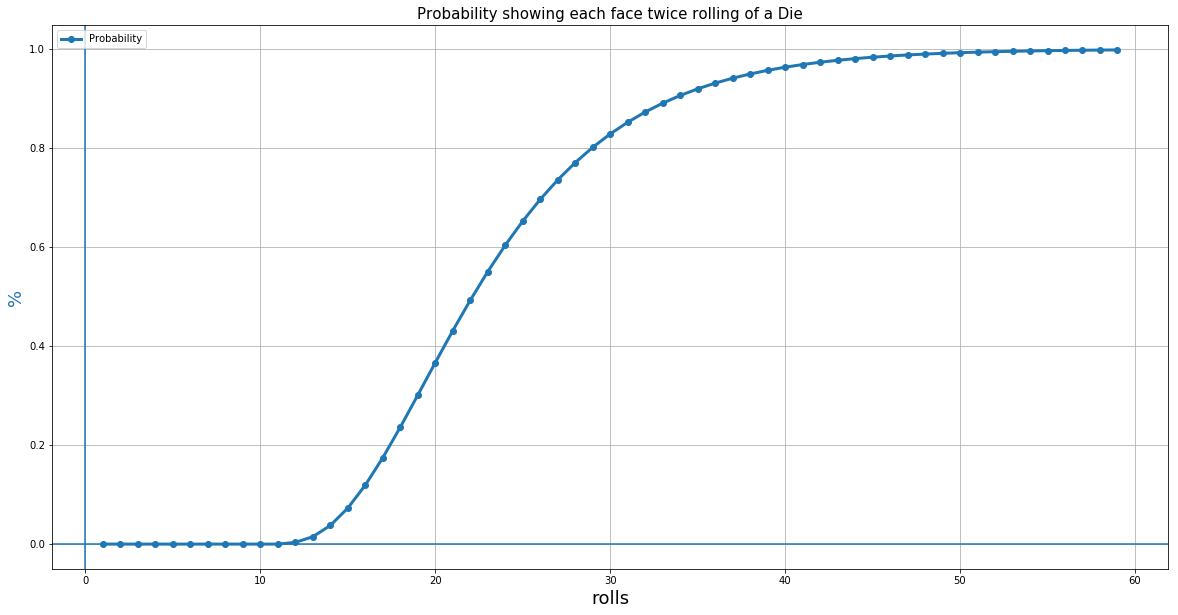

In [10]:
# plot
X = range(1,60)
Y = [RR((M**i)[0,27]) for i in X]
plt.clf()
fig, ax = plt.subplots(figsize=(20, 10))
color = 'tab:blue'
plt.plot(X, Y,  'o-', color=color, label='Probability', lw=3)
plt.axhline(y=0)
plt.axvline(x=0)
plt.ylabel('%', color=color, fontsize=18)
plt.xlabel('rolls', color='black', fontsize=18)
plt.grid()
plt.legend(loc='upper left')
plt.title("Probability showing each face twice rolling of a Die",fontsize=15)
plt.show()